## This  Analysis is made by <br>Research & Development Team in Theragent Genomecare Co.Ltd. Korea

**SNP DEFINITION**

DNA sequence variations that occur when a single nucleotide (A, T, C, or G) in the genome sequence is altered. Each individual has many single nucleotide polymorphisms that together create a unique DNA pattern for that person. SNPs promise to significantly advance our ability to understand and treat human disease.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data Frame
df = pd.read_csv("../case_con_mer.csv")
df.head(2)

,CHROM,POS,ID,REF,1c,2c,3c,4c,5c,6c,...,1cn,2cn,3cn,4cn,5cn,6cn,7cn,8cn,9cn,10cn
0,chrM,146,.,T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,C/C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chrM,150,.,T,C/C,C/C,C/C,NaN,NaN,NaN,...,C/C,C/C,C/C,C/C,C/C,NaN,C/C,NaN,NaN,NaN


In [4]:
df.shape

(11176568, 24)

## Method 1, In this method we Consider NaN as Reference
## So we groupby datas into 2 categories

For this we divide by having NaN value in one Category 100% and not NaN 100% in other category

In [5]:
df.columns

Index(['CHROM', 'POS', 'ID', 'REF', '1c', '2c', '3c', '4c', '5c', '6c', '7c',
       '8c', '9c', '10c', '1cn', '2cn', '3cn', '4cn', '5cn', '6cn', '7cn',
       '8cn', '9cn', '10cn'],
      dtype='object')

In [7]:
#df1 = df1[df1.isnull().sum(axis=1)<17]

case_con = df[(df.loc[:,[ '1c', '2c', '3c', '4c', '5c', '6c', '7c','8c', '9c', '10c']].isnull().sum(axis =1)<2)
    &(df.loc[:,['1cn', '2cn', '3cn', '4cn', '5cn', '6cn', '7cn','8cn', '9cn', '10cn']].isnull().sum(axis =1)>9)] #We Can accept up to  80 %
#case hase SNP but  Control has no SNP

#case NAN more and Control NAN is Less
con_case = df[(df.loc[:,[ '1c', '2c', '3c', '4c', '5c', '6c', '7c','8c', '9c', '10c']].isnull().sum(axis =1)>9) \
    &(df.loc[:,['1cn', '2cn', '3cn', '4cn', '5cn', '6cn', '7cn','8cn', '9cn', '10cn']].isnull().sum(axis =1)<2)]
#case has no SNP but Control has SNP

#case_on_con means nan value in more than 9 (10) in control but all SNP in case
#con_on_case means all SNP value exists in Control but not in case

In [8]:
pd.set_option('display.max_columns', 50)
pd.set_option("display.max_rows",50)

In [10]:
#case_con.to_excel("../case_con.xlsx",index=False)
case_con.shape

(20, 24)

In [12]:
test = case_con.sort_values(by = ["CHROM"],ascending=True)

In [14]:
#This is NaN value out from Whole Data
pos_in = ['20319535','20320988','20321943','20322122','20325719','20326890','20326945','82378418','82436482','3076053',\
          '3076844','3079113','3080799','3081502','3081758','113942151','63606023']
#These Pos in Are selected From whole File 
#while checking the Below 3 Position Manually We Find thes are not Complete Data


In [25]:
result = test[test.POS.isin(pos_in)]
#list(test[~(test.POS.isin(pos_in))].POS)
test[~(test.POS.isin(pos_in))]

,CHROM,POS,ID,REF,1c,2c,3c,4c,5c,6c,7c,8c,9c,10c,1cn,2cn,3cn,4cn,5cn,6cn,7cn,8cn,9cn,10cn
6061647,chr11,75245928,rs144542292;rs55765476,C,CGTGT/CGTGT,C/CGTGT,"CGT,CGTGT/CGT,CGTGT","CGTGTGT,CGTGTGTGTGT/CGTGTGT,CGTGTGTGTGT","CGTGT,CGTGTGT/CGTGT,CGTGTGT","CGTGT,CGTGTGTGTGT/CGTGT,CGTGTGTGTGT","CGT,CGTGT/CGT,CGTGT",C/CGTGT,NaN,"CGTGT,CGTGTGTGTGT/CGTGT,CGTGTGTGTGT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1729483,chr2,20326677,rs17652106,T,T/C,T/C,NaN,T/C,T/C,T/C,T/C,T/C,T/C,T/C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9150297,chr9,130898247,rs35318794,C,C/T,C/T,C/T,C/T,C/T,C/T,C/T,C/T,C/T,C/T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#con_case
#In this Case it is difficult to make analysis since case is as per by reference , 
#But we can make another Reference for Korean People or we can also say if this SNP rises there is little chance of Preterm

<function matplotlib.pyplot.show(*args, **kw)>

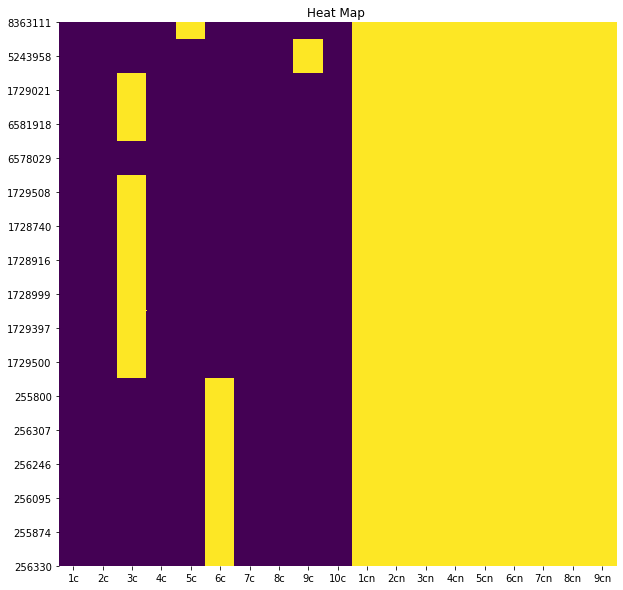

In [33]:
fig = plt.figure(figsize=(10,10))
plt.title("Heat Map ")
plt.xlabel("Case(c) & Control(cn)")
plt.ylabel("Position of Sequence (SNP)")
sns.heatmap(result.iloc[:,4:23].isnull(),cmap = "viridis",\
            cbar = False )
plt.savefig("../heatMeap_case_control.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

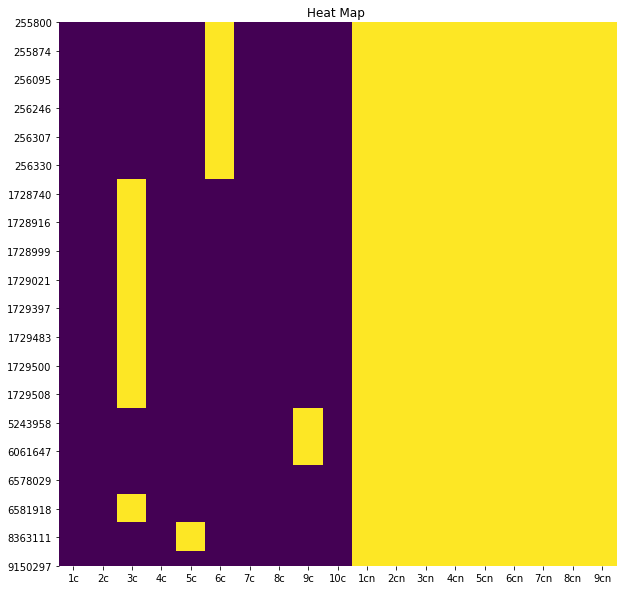

In [31]:
fig = plt.figure(figsize=(10,10))
plt.title("Heat Map ")
plt.xlabel("Case(c) & Control(cn)")
plt.ylabel("Position of Sequence (SNP)")
sns.heatmap(case_con.iloc[:,4:23].isnull(),cmap = "viridis",\
            cbar = False )
plt.savefig("../heatMeap_case_control.png")
plt.show

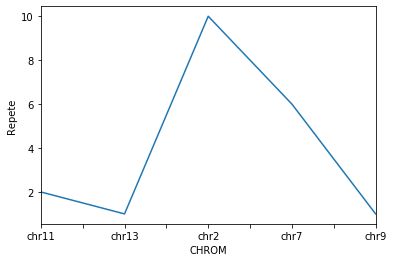

In [32]:
rep_chrom = case_con.groupby(["CHROM"]).size()
plt.xlabel("Chromosome")
plt.ylabel("Repete")
rep_chrom.plot()

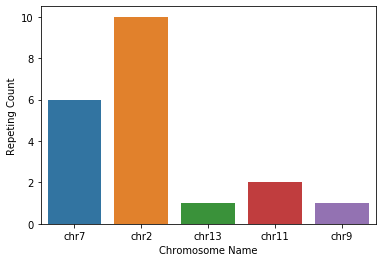

In [33]:
sns.countplot(case_con["CHROM"])
plt.xlabel("Chromosome Name")
plt.ylabel("Repeting Count")
plt.savefig("../chr_n_Rep.png")

In [34]:
case_con.shape

(20, 24)

## Method 2
#### Here we compare both case & Control 
## Simply
* isin Case    ?? & not isin Control ??
* isin Control ?? & not isin Case ??

In [2]:
df.head()

NameError: name 'df' is not defined

In [ ]:
#Here we dont care NaN 
# In the begining we only remove rows having sum of NaN more than 12

In [26]:
print(df.shape)
df =df[df.isna().sum(axis=1)<12]
df.shape

(11176568, 24)


(4246244, 24)

In [27]:
#Above we remove many rows having NaN 
print("We reduced the Size of Datas to Percent ",(4246244/11176568)*100)
df.head()
#Later we remove all NaN values

We reduced the Size of Datas to Percent  37.99237834011299


,CHROM,POS,ID,REF,1c,2c,3c,4c,5c,6c,7c,8c,9c,10c,1cn,2cn,3cn,4cn,5cn,6cn,7cn,8cn,9cn,10cn
1,chrM,150,.,T,C/C,C/C,C/C,NaN,NaN,NaN,NaN,C/C,C/C,NaN,C/C,C/C,C/C,C/C,C/C,NaN,C/C,NaN,NaN,NaN
5,chrM,195,.,C,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,NaN,T/T,T/T,T/T,NaN,T/T,T/T,T/T,NaN,T/T,T/T
14,chrM,302,.,AC,NaN,AC/A,AC/A,NaN,AC/A,AC/A,AC/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC/A,NaN,NaN,AC/A,AC/A,AC/A
15,chr17,302,rs35998167,T,TA/TA,TA/TA,TA/TA,TA/TA,T/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA
17,chrM,410,.,A,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T


##### Now We compare col by col and if the all the elements is same Col is same then we remove all datas
#### We only analyse datas having different elements in each other

In [16]:
#df1[(df1["1c"].isin(df1["1cn"])) & (df1["2c"].isin(df1["2cn"]))]
#df_eq = df[(df["1c"]==df["1cn"])&(df["2c"]==df["2cn"])&(df["3c"]==df["3cn"])&(df["4c"]==df["4cn"])\
#        &(df["5c"]==df["5cn"])&(df["6c"]==df["6cn"])&(df["7c"]==df["7cn"])&(df["8c"]==df["8cn"])\
#        &(df["9c"]==df["9cn"])&(df["10c"]==df["10cn"])]

#df_noeq = df[~((df["1c"]==df["1cn"])&(df["2c"]==df["2cn"])&(df["3c"]==df["3cn"])&(df["4c"]==df["4cn"])\
#        &(df["5c"]==df["5cn"])&(df["6c"]==df["6cn"])&(df["7c"]==df["7cn"])&(df["8c"]==df["8cn"])\
#        &(df["9c"]==df["9cn"])&(df["10c"]==df["10cn"]))]

In [17]:
#For testing
#df_eq.shape[0]+df_noeq.shape[0]==df.shape[0]

In [18]:
# To reduce Computer Memory replace df to df_noeq Data Frame
#df = df_noeq

In [19]:
#df.head()

In [20]:
df.shape

(3834227, 24)

In [22]:
#df = df.drop_duplicates(keep="first")
df.shape

(3798682, 24)

In [ ]:
#We removed the all repeating values #Since keep = "first" may not be the proper method . We analyse this later

In [28]:
#Now we Remove all NaN rows 
#Because We analysed NaN in first Steps
df = df.dropna() # If any rows having only one NaN item we remove drop that row
df.shape

(887951, 24)

In [29]:
#We Can see till Now this is a Big Data 
#There are more than 460 K Rows 
df["case"]=df["1c"]+"," +df["2c"] +"," + df["3c"]+"," +df["4c"]+","  +df["5c"]+"," +df["6c"]+","+ df["7c"]+"," +df["8c"]+"," + df["9c"]+"," +df["10c"]
df["Control"]=df["1cn"]+","+df["2cn"]+","+df["3cn"]+","+df["4cn"]+","+df["5cn"]+","+df["6cn"]+","+df["7cn"]+"," +df["8cn"]+","+ df["9cn"]+"," +df["10cn"]

In [30]:
df.head()

,CHROM,POS,ID,REF,1c,2c,3c,4c,5c,6c,7c,8c,9c,10c,1cn,2cn,3cn,4cn,5cn,6cn,7cn,8cn,9cn,10cn,case,Control
15,chr17,302,rs35998167,T,TA/TA,TA/TA,TA/TA,TA/TA,T/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,"TA/TA,TA/TA,TA/TA,TA/TA,T/TA,TA/TA,TA/TA,TA/TA...","TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/T..."
17,chrM,410,.,A,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,"T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T","T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T"
25,chr17,828,rs62053745,T,C/C,C/C,C/C,C/C,T/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,"C/C,C/C,C/C,C/C,T/C,C/C,C/C,C/C,C/C,C/C","C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C"
26,chr17,834,rs9747082,G,A/A,A/A,A/A,A/A,G/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,"A/A,A/A,A/A,A/A,G/A,A/A,A/A,A/A,A/A,A/A","A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A"
35,chr17,1869,rs62053748,A,T/T,T/T,T/T,T/T,A/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,"T/T,T/T,T/T,T/T,A/T,T/T,T/T,T/T,T/T,T/T","T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T"


### For Easy View of Datas we will Remove all the columns since we Created Combined 2 Cols Case & Control

In [31]:
df = df.loc[:,["CHROM","POS","ID","REF","case","Control"]]
print(df.shape)
df.head(4)

(887951, 6)


,CHROM,POS,ID,REF,case,Control
15,chr17,302,rs35998167,T,"TA/TA,TA/TA,TA/TA,TA/TA,T/TA,TA/TA,TA/TA,TA/TA...","TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/T..."
17,chrM,410,.,A,"T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T","T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T"
25,chr17,828,rs62053745,T,"C/C,C/C,C/C,C/C,T/C,C/C,C/C,C/C,C/C,C/C","C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C"
26,chr17,834,rs9747082,G,"A/A,A/A,A/A,A/A,G/A,A/A,A/A,A/A,A/A,A/A","A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A"


In [32]:
#We Can see Col is reduced to 6 Columns
# Lets apply Function to Filter the case & Control Data
from collections import Counter

df["case_max"] = df["case"].apply(lambda x :(Counter((list(x.split(","))))).most_common(1))
df["cont_max"] = df["Control"].apply(lambda x:(Counter(x.split(","))).most_common(1))
df.head()

#In this Function We only take out Most repeating SNP combination from Case & Control

,CHROM,POS,ID,REF,case,Control,case_max,cont_max
15,chr17,302,rs35998167,T,"TA/TA,TA/TA,TA/TA,TA/TA,T/TA,TA/TA,TA/TA,TA/TA...","TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/T...","[(TA/TA, 9)]","[(TA/TA, 10)]"
17,chrM,410,.,A,"T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T","T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T","[(T/T, 10)]","[(T/T, 10)]"
25,chr17,828,rs62053745,T,"C/C,C/C,C/C,C/C,T/C,C/C,C/C,C/C,C/C,C/C","C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C","[(C/C, 9)]","[(C/C, 10)]"
26,chr17,834,rs9747082,G,"A/A,A/A,A/A,A/A,G/A,A/A,A/A,A/A,A/A,A/A","A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A","[(A/A, 9)]","[(A/A, 10)]"
35,chr17,1869,rs62053748,A,"T/T,T/T,T/T,T/T,A/T,T/T,T/T,T/T,T/T,T/T","T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T","[(T/T, 9)]","[(T/T, 10)]"


### The above case_max and cont_max elements are tuple inside list so avoid list

In [28]:
#Create a new Col and Drop same Col
df["case_r"]= df["case_max"].apply(lambda x : x[0])
df =df.drop("case_max",axis=1)

#Create a new Col and drop same Col.
df["cont_r"]= df["cont_max"].apply(lambda x : x[0])
df = df.drop("cont_max",axis =1)
df.head()

,CHROM,POS,ID,REF,case,Control,case_r,cont_r
15,chr17,302,rs35998167,T,"TA/TA,TA/TA,TA/TA,TA/TA,T/TA,TA/TA,TA/TA,TA/TA...","TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/T...","(TA/TA, 9)","(TA/TA, 10)"
25,chr17,828,rs62053745,T,"C/C,C/C,C/C,C/C,T/C,C/C,C/C,C/C,C/C,C/C","C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C","(C/C, 9)","(C/C, 10)"
26,chr17,834,rs9747082,G,"A/A,A/A,A/A,A/A,G/A,A/A,A/A,A/A,A/A,A/A","A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A","(A/A, 9)","(A/A, 10)"
35,chr17,1869,rs62053748,A,"T/T,T/T,T/T,T/T,A/T,T/T,T/T,T/T,T/T,T/T","T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T,T/T","(T/T, 9)","(T/T, 10)"
36,chr17,2041,rs35054424,G,"A/A,A/A,A/A,A/A,G/A,A/A,A/A,A/A,A/A,A/A","A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A","(A/A, 9)","(A/A, 10)"


In [29]:
# For easy Analysis Purpose we Combine case_r and cont_r as a Single Column
df["case_cont"] = df["case_r"]+df["cont_r"]

In [30]:
df.head(2)

,CHROM,POS,ID,REF,case,Control,case_r,cont_r,case_cont
15,chr17,302,rs35998167,T,"TA/TA,TA/TA,TA/TA,TA/TA,T/TA,TA/TA,TA/TA,TA/TA...","TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/TA,TA/T...","(TA/TA, 9)","(TA/TA, 10)","(TA/TA, 9, TA/TA, 10)"
25,chr17,828,rs62053745,T,"C/C,C/C,C/C,C/C,T/C,C/C,C/C,C/C,C/C,C/C","C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C,C/C","(C/C, 9)","(C/C, 10)","(C/C, 9, C/C, 10)"


In [ ]:
df.shape

In [ ]:
#Since we created a Single Column, So lets remove independent Columns
#df = df.iloc[:,[0,1,2,3,4,5,8]]
df = 
df.head(2)

### Final Step

In [ ]:
df["Result"] = df["case_cont"].apply(lambda x : True if((x[0]==x[2])&(x[1]>4)&(x[3]>4)) else False)
#In this Case,
#We are Comparing First element of each i.e. "TA/TA" == "TA/TA" and more than 4 (40 %)
#We assumed that if both side 50 datas are same No decisions can be made

In [ ]:
df.head(2)

In [ ]:
## So Lets take Out datas 100 % Different from each Sides

In [ ]:
df["Result"] = df["case_cont"].apply(lambda x : True if((x[0]!=x[2])&(x[1]>8)&(x[3]>8)) else False)
#In this Case we divided that case & Control elements are different from each Others and repeating values are higher than 9 (90%)


In [ ]:
df[df.Result==True]

#### In this above table we can see this 6 Pos and ref Ids are 90 % different from each other 

### Our Major Findings 

In [ ]:
case_con

In [ ]:
con_case

In [ ]:
result = df[df.Result==True]
result

### `List of Influencing Chromosomes & Positions`

In [ ]:
inf_id = list(case_con["ID"]) + list(con_case["ID"]) +list(result["ID"])
inf_id

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(case_con["CHROM"],
             order = case_con.CHROM.value_counts().index)
plt.xlabel("Chromosome Name_POsition")
plt.ylabel("Repeting Count")
plt.savefig("../CHRM_count_80.png")

### Effect of these ID we analyse in chapter 2 Thank You
